          Channel      Region          Fresh          Milk       Grocery  \
count  440.000000  440.000000     440.000000    440.000000    440.000000   
mean     1.322727    2.543182   12000.297727   5796.265909   7951.277273   
std      0.468052    0.774272   12647.328865   7380.377175   9503.162829   
min      1.000000    1.000000       3.000000     55.000000      3.000000   
25%      1.000000    2.000000    3127.750000   1533.000000   2153.000000   
50%      1.000000    3.000000    8504.000000   3627.000000   4755.500000   
75%      2.000000    3.000000   16933.750000   7190.250000  10655.750000   
max      2.000000    3.000000  112151.000000  73498.000000  92780.000000   

             Frozen  Detergents_Paper    Delicassen  
count    440.000000        440.000000    440.000000  
mean    3071.931818       2881.493182   1524.870455  
std     4854.673333       4767.854448   2820.105937  
min       25.000000          3.000000      3.000000  
25%      742.250000        256.750000    408.

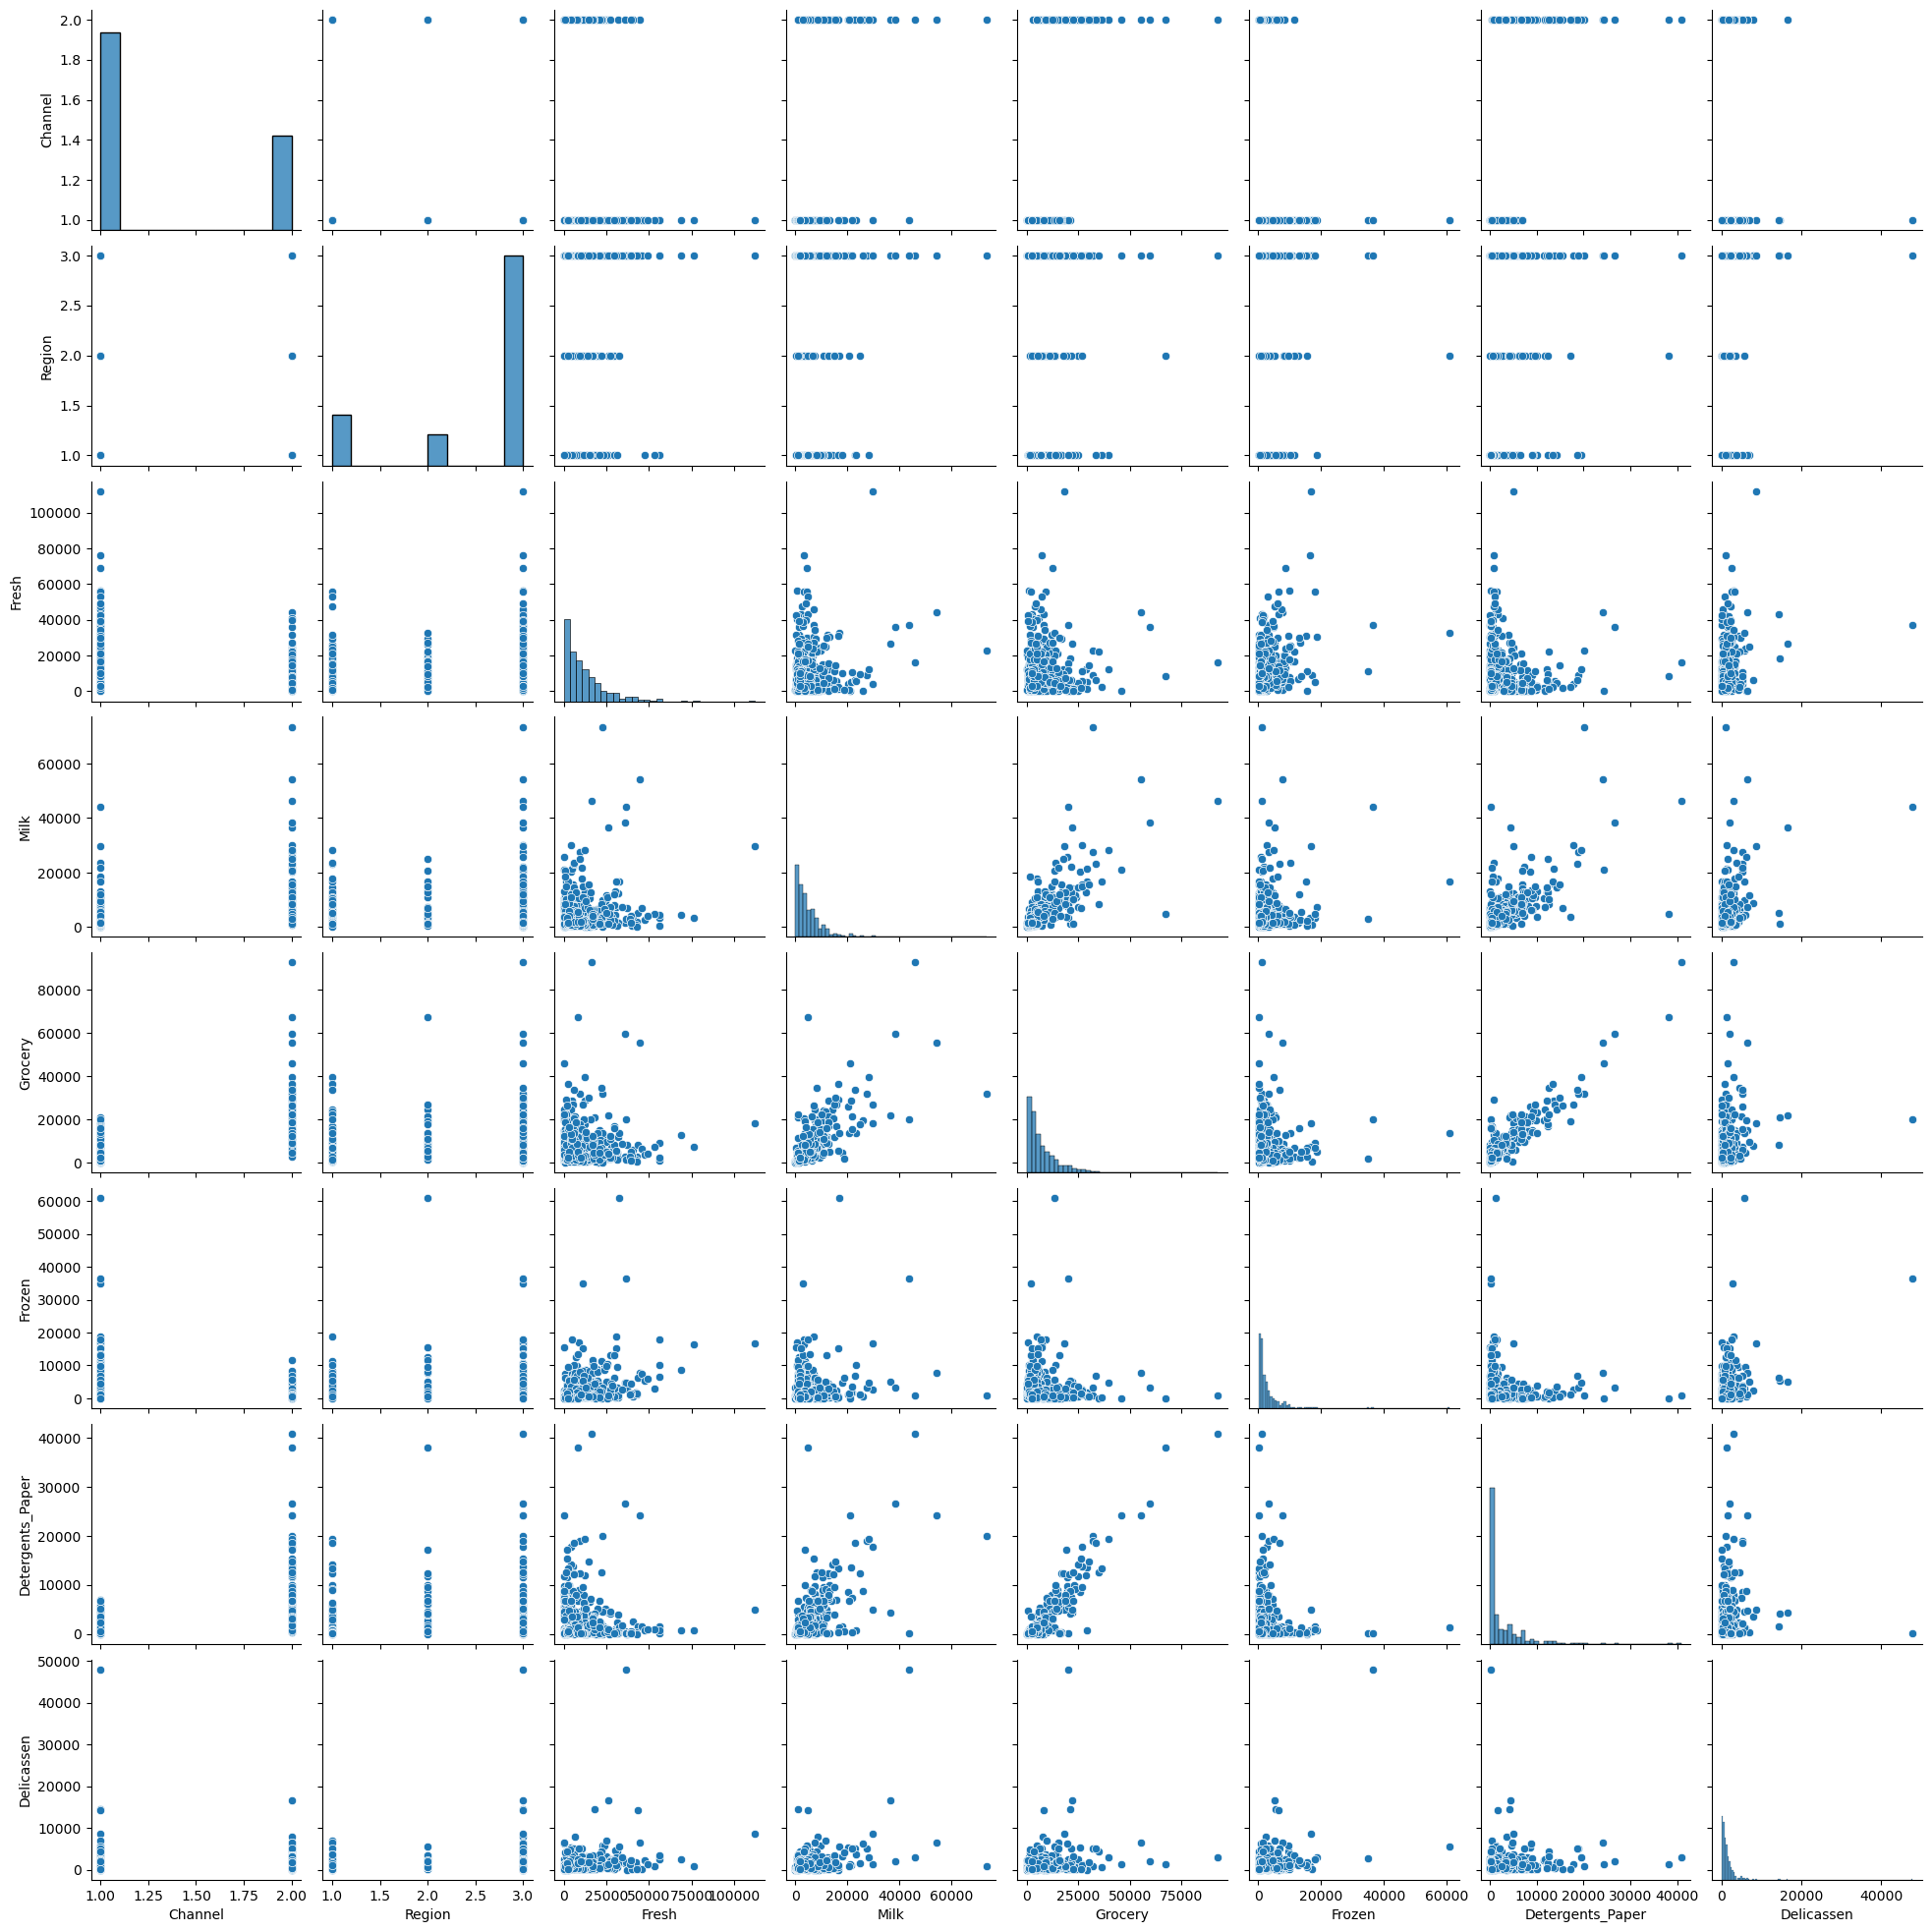

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64
Mutual information scores for all columns:
Channel: 0.0225
Region: 0.0000
Fresh: 0.0000
Milk: 0.0138
Grocery: 0.0000
Frozen: 0.0000
Detergents_Paper: 0.0188
Decision Tree: 0.5973270644888397 0.7026346988194936 0.5340909090909091
Random Forest: 0.7625635234330886 0.7055903866248694 0.8295454545454546
Neural Network: 0.7510005717552889 0.7024064171122995 0.8068181818181818
Silhouette score for k-means: 0.43916005773275374
Silhouette score for agglomerative clustering: 0.407084011561323
Mutual information scores for all columns:
Channel: 0.0225
Region: 0.0000
Fresh: 0.0000
Milk: 0.0138
Grocery: 0.0000
Frozen: 0.0000
Detergents_Paper: 0.0188

Observations and Conclusions:
The Random Forest classifier performs better than the Decision Tree and Neural Network classifiers based on the F1 score, precision, a

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import f1_score, precision_score, recall_score, roc_curve, auc, silhouette_score, silhouette_samples
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
from sklearn import tree
from sklearn.tree import export_graphviz
import graphviz
from xgboost import plot_tree
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

import warnings
warnings.filterwarnings('ignore')

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv"
data = pd.read_csv(url)

# Data description
print(data.describe())

# Visualization
sns.pairplot(data)
plt.show()

# Check for missing values
print(data.isnull().sum())

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
# In this case, we are using the 'Region' column as the target variable.

# Revisit data preprocessing and splitting steps
selected_features = [col for col in data.columns if col != 'Region']
X = data[selected_features]

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)

# Split the data
X = scaled_data
y = data['Region']

# Compute mutual information scores for all features
mi_scores = mutual_info_classif(X, y)

# Print mutual information scores for all columns
print("Mutual information scores for all columns:")
for column, score in zip(data.columns, mi_scores):
    print(f"{column}: {score:.4f}")
    
X = scaled_data
y = data['Region'] # Assuming 'Region' as the target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree
dt = DecisionTreeClassifier(class_weight='balanced')
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Neural Network
nn = MLPClassifier()
nn.fit(X_train, y_train)
y_pred_nn = nn.predict(X_test)

dt.feature_importances_

# k-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X)

# Agglomerative (hierarchical) clustering
agg = AgglomerativeClustering(n_clusters=3)
agg_labels = agg.fit_predict(X)

# Classifier performance
def evaluate_classifier(y_test, y_pred):
    f1 = f1_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    return f1, precision, recall

f1_dt, precision_dt, recall_dt = evaluate_classifier(y_test, y_pred_dt)
f1_rf, precision_rf, recall_rf = evaluate_classifier(y_test, y_pred_rf)
f1_nn, precision_nn, recall_nn = evaluate_classifier(y_test, y_pred_nn)

# Clustering performance
def evaluate_clustering(X, labels):
    silhouette_avg = silhouette_score(X, labels)
    return silhouette_avg

silhouette_kmeans = evaluate_clustering(X, kmeans_labels)
silhouette_agg = evaluate_clustering(X, agg_labels)

# Print classifier performance
print("Decision Tree:", f1_dt, precision_dt, recall_dt)
print("Random Forest:", f1_rf, precision_rf, recall_rf)
print("Neural Network:", f1_nn, precision_nn, recall_nn)

# Print clustering performance
print("Silhouette score for k-means:", silhouette_kmeans)
print("Silhouette score for agglomerative clustering:", silhouette_agg)

# Print mutual information scores for all columns
print("Mutual information scores for all columns:")
for column, score in zip(data.columns, mi_scores):
    print(f"{column}: {score:.4f}")

# Observations and conclusions
print("\nObservations and Conclusions:")

# Conclusions based on classifier performance
print("The Random Forest classifier performs better than the Decision Tree and Neural Network classifiers based on the F1 score, precision, and recall.")

# Conclusions based on clustering performance
print("Both k-means and agglomerative clustering have similar silhouette scores, indicating that their performance in clustering the data is comparable.")

# Conclusions based on mutual information scores
print("Based on the mutual information scores, some features are more informative than others for predicting the target variable. It may be beneficial to focus on these features when building classification models.")

# Decision Tree
dt_params = {
    "max_depth": [None, 5, 10, 15, 20],
    "min_samples_leaf": [1, 2, 5, 10],
    "min_samples_split": [2, 5, 10, 20]
}

dt = DecisionTreeClassifier()
dt_grid = GridSearchCV(dt, dt_params, cv=5, scoring='f1_weighted', n_jobs=-1)
dt_grid.fit(X, y)
best_dt = dt_grid.best_estimator_

# Random Forest
rf_params = {
    "n_estimators": [10, 50, 100, 200],
    "max_depth": [None, 5, 10, 15, 20],
    "min_samples_leaf": [1, 2, 5, 10],
    "min_samples_split": [2, 5, 10, 20]
}

rf = RandomForestClassifier()
rf_grid = GridSearchCV(rf, rf_params, cv=5, scoring='f1_weighted', n_jobs=-1)
rf_grid.fit(X, y)
best_rf = rf_grid.best_estimator_

# Neural Network
nn_params = {
    "hidden_layer_sizes": [(50,), (100,), (50, 50)],
    "alpha": [0.0001, 0.001, 0.01],
    "activation": ["relu", "tanh"],
    "solver": ["adam", "sgd"]
}

nn = MLPClassifier(max_iter=500, early_stopping=True)
nn_grid = GridSearchCV(nn, nn_params, cv=5, scoring='f1_weighted', n_jobs=-1)
nn_grid.fit(X, y)
best_nn = nn_grid.best_estimator_


print("Best Decision Tree hyperparameters:", dt_grid.best_params_)
print("Best Random Forest hyperparameters:", rf_grid.best_params_)
print("Best Neural Network hyperparameters:", nn_grid.best_params_)


# Perform 5-fold cross-validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)

dt_scores = cross_val_score(best_dt, X, y, cv=cv, scoring='f1_weighted', n_jobs=-1)
rf_scores = cross_val_score(best_rf, X, y, cv=cv, scoring='f1_weighted', n_jobs=-1)
nn_scores = cross_val_score(best_nn, X, y, cv=cv, scoring='f1_weighted', n_jobs=-1)

# Print cross-validation results
print("Decision Tree CV scores:", dt_scores)
print("Random Forest CV scores:", rf_scores)
print("Neural Network CV scores:", nn_scores)

print("Decision Tree CV mean score:", np.mean(dt_scores))
print("Random Forest CV mean score:", np.mean(rf_scores))
print("Neural Network CV mean score:", np.mean(nn_scores))

In [13]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv"
data = pd.read_csv(url)

selected_features = [col for col in data.columns if col != 'Region']
X = data[selected_features]

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)

# Range of possible cluster numbers
cluster_range = range(1, 10)

# Calculate inertia and silhouette scores for k-means and agglomerative clustering
kmeans_inertias = []
kmeans_silhouettes = []
agg_inertias = []
agg_silhouettes = []

for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans_labels = kmeans.fit_predict(scaled_data)
    kmeans_inertias.append(kmeans.inertia_)
    
    if n_clusters > 1:
        kmeans_silhouettes.append(silhouette_score(scaled_data, kmeans_labels))
        
    agg = AgglomerativeClustering(n_clusters=n_clusters)
    agg_labels = agg.fit_predict(scaled_data)
    
    if n_clusters > 1:
        agg_silhouettes.append(silhouette_score(scaled_data, agg_labels))

# Print inertia and silhouette scores
print("K-means Inertia:")
for i, inertia in enumerate(kmeans_inertias):
    print(f"Clusters {i + 1}: {inertia:.4f}")

print("\nK-means Silhouette Scores:")
for i, silhouette in enumerate(kmeans_silhouettes):
    print(f"Clusters {i + 2}: {silhouette:.4f}")

print("\nAgglomerative Clustering Silhouette Scores:")
for i, silhouette in enumerate(agg_silhouettes):
    print(f"Clusters {i + 2}: {silhouette:.4f}")


K-means Inertia:
Clusters 1: 3080.0000
Clusters 2: 2161.8177
Clusters 3: 1711.5066
Clusters 4: 1409.4802
Clusters 5: 1144.3364
Clusters 6: 1002.3286
Clusters 7: 883.1673
Clusters 8: 805.5663
Clusters 9: 719.7645

K-means Silhouette Scores:
Clusters 2: 0.4446
Clusters 3: 0.4392
Clusters 4: 0.4450
Clusters 5: 0.4386
Clusters 6: 0.4465
Clusters 7: 0.4235
Clusters 8: 0.4091
Clusters 9: 0.3823

Agglomerative Clustering Silhouette Scores:
Clusters 2: 0.4406
Clusters 3: 0.4071
Clusters 4: 0.4117
Clusters 5: 0.4031
Clusters 6: 0.4021
Clusters 7: 0.4033
Clusters 8: 0.4132
Clusters 9: 0.4083


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


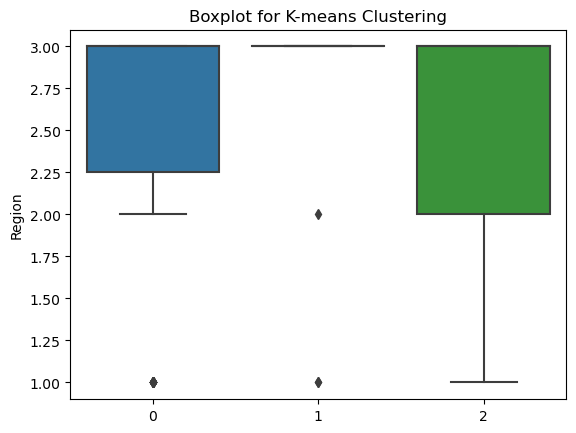

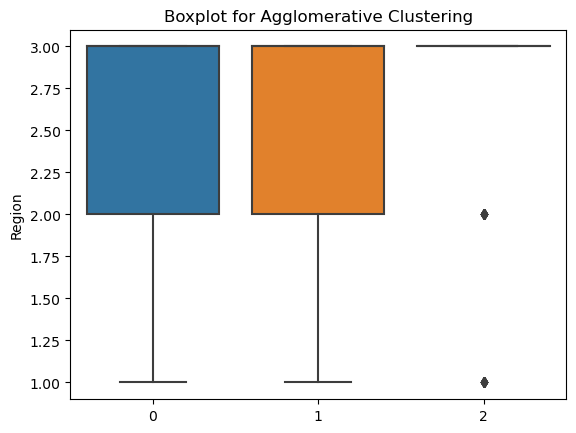

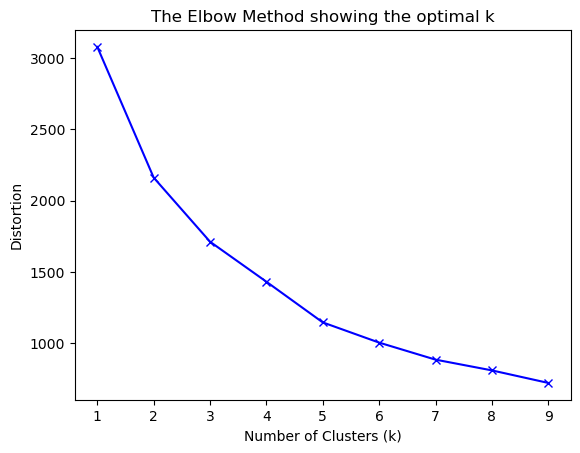

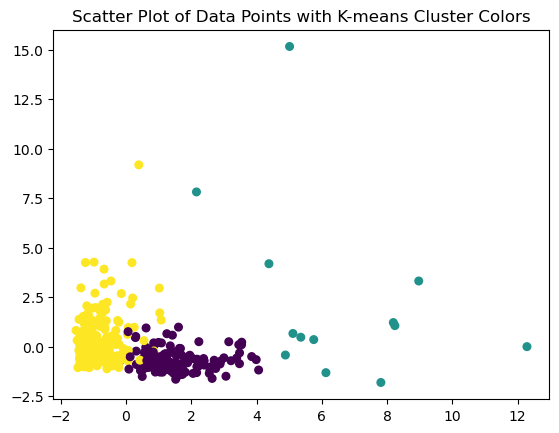

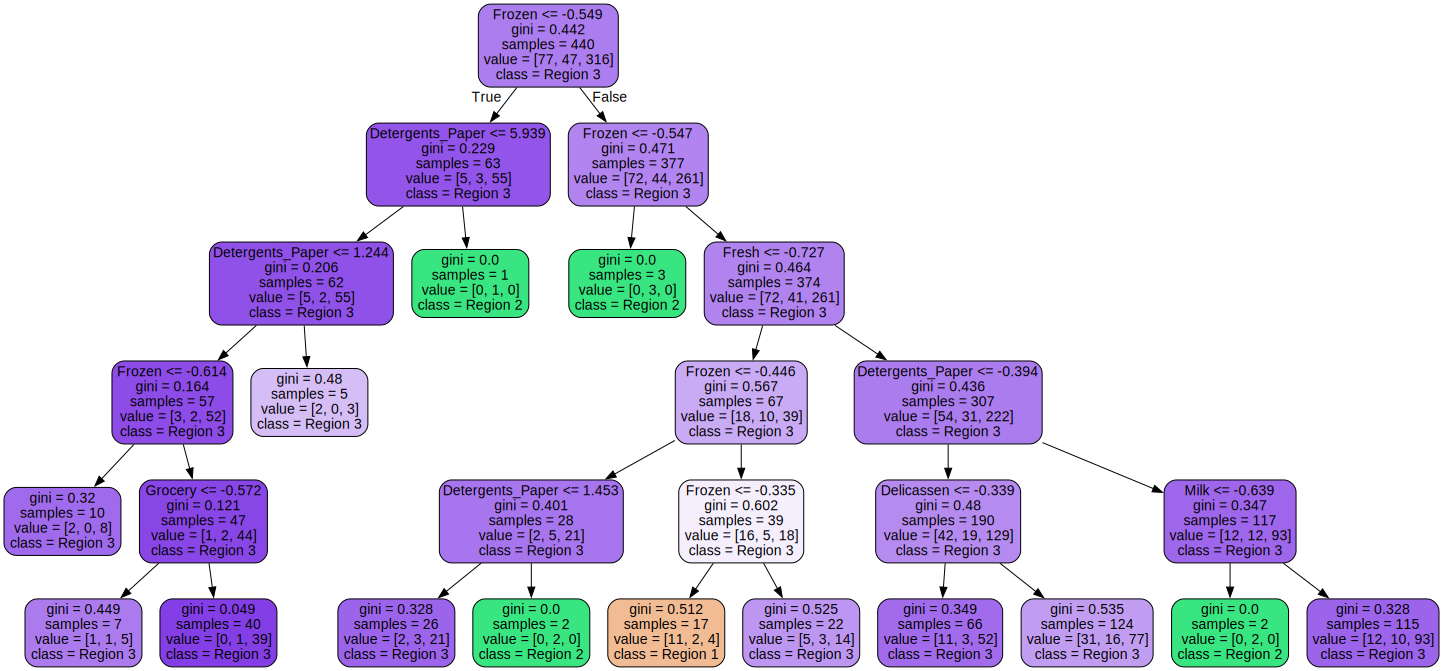

In [12]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.decomposition import PCA
from sklearn.preprocessing import label_binarize
from IPython.display import SVG
from graphviz import Source

# Boxplot for k-means clustering
sns.boxplot(x=kmeans_labels, y=data['Region'])
plt.title('Boxplot for K-means Clustering')
plt.show()

# Boxplot for agglomerative clustering
sns.boxplot(x=agg_labels, y=data['Region'])
plt.title('Boxplot for Agglomerative Clustering')
plt.show()

# Elbow method for k-means
distortions = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    distortions.append(kmeans.inertia_)

plt.plot(K, distortions, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

# Scatter plot of data points with cluster colors
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X)

fig, ax = plt.subplots()
scatter = ax.scatter(principal_components[:, 0], principal_components[:, 1], c=kmeans_labels, cmap='viridis', s=30)
plt.title('Scatter Plot of Data Points with K-means Cluster Colors')
plt.show()


dot_data = export_graphviz(best_dt, out_file=None, filled=True, rounded=True, feature_names=selected_features, class_names=[f'Region {cls}' for cls in best_dt.classes_])
graph = Source(dot_data)
SVG(graph.pipe(format='svg'))

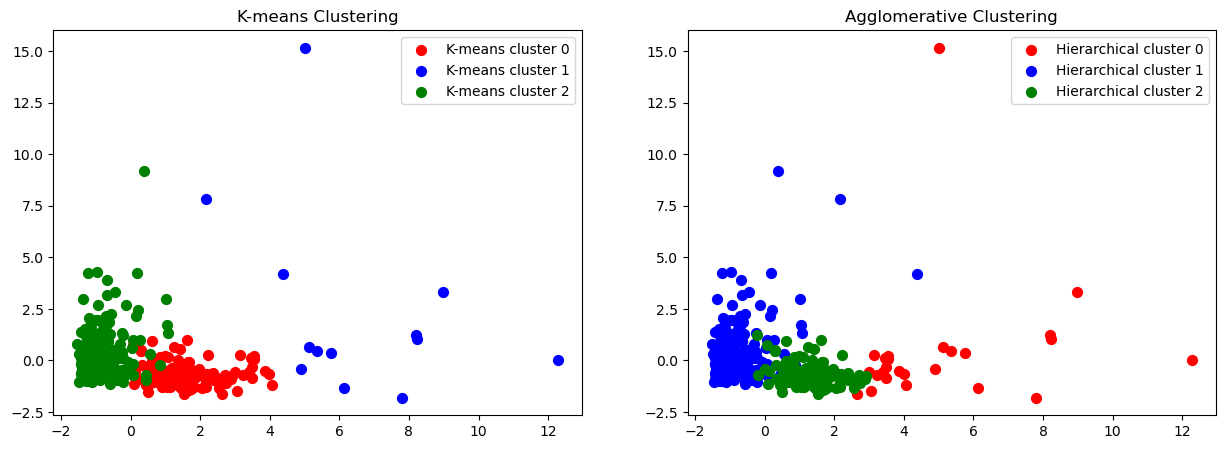

In [4]:
# Define the colors for the different clusters
colors = ['red', 'blue', 'green']

# Number of clusters
n_clusters = 3

# Create a scatter plot of the data points with the cluster colors
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

for i in range(n_clusters):
    axes[0].scatter(principal_components[kmeans_labels == i, 0], principal_components[kmeans_labels == i, 1], s=50, c=colors[i], label='K-means cluster {}'.format(i))
    axes[1].scatter(principal_components[agg_labels == i, 0], principal_components[agg_labels == i, 1], s=50, c=colors[i], label='Hierarchical cluster {}'.format(i))

axes[0].set_title("K-means Clustering")
axes[1].set_title("Agglomerative Clustering")

for ax in axes:
    ax.legend()

plt.show()


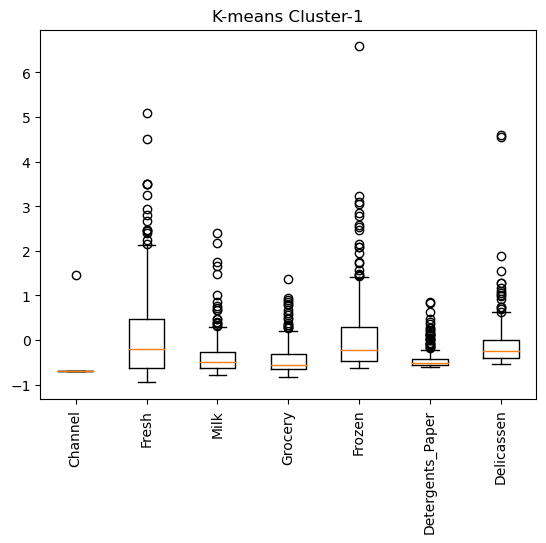

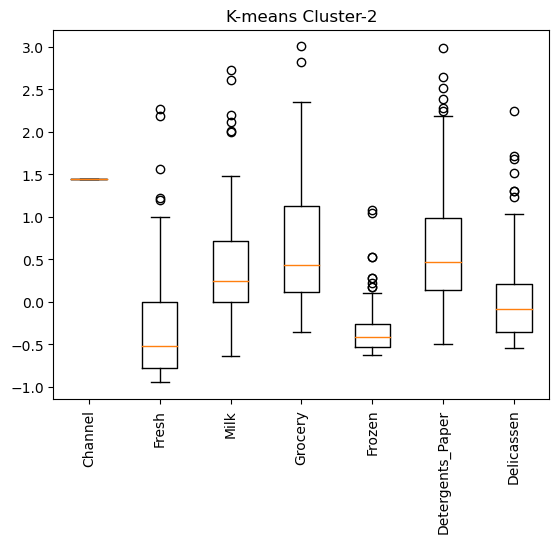

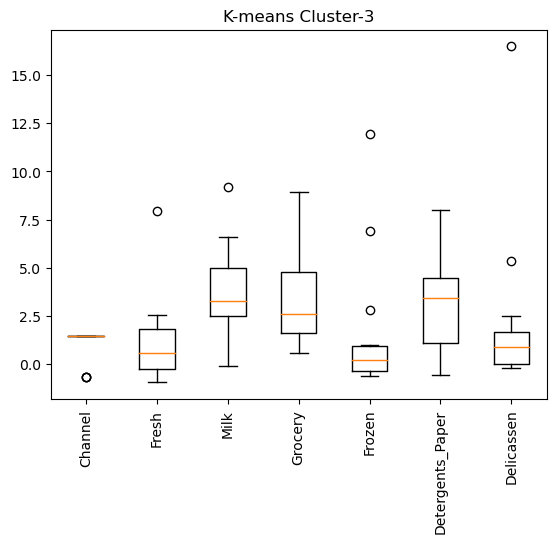

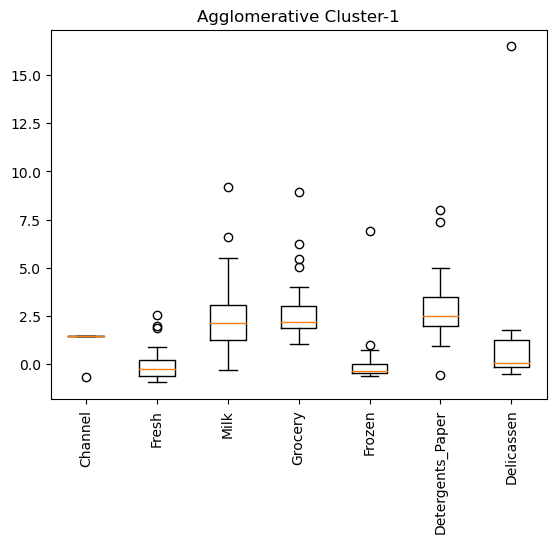

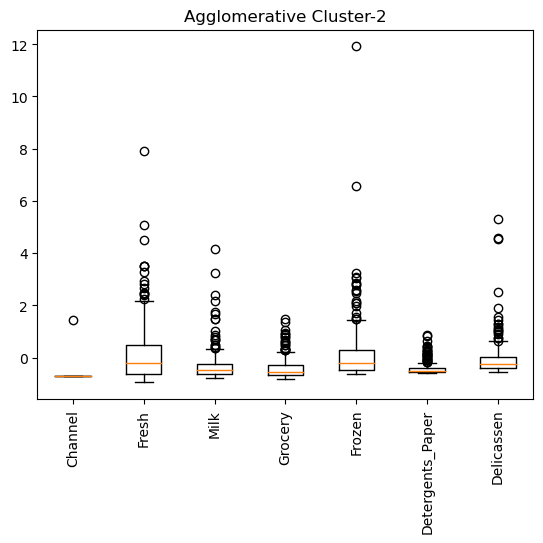

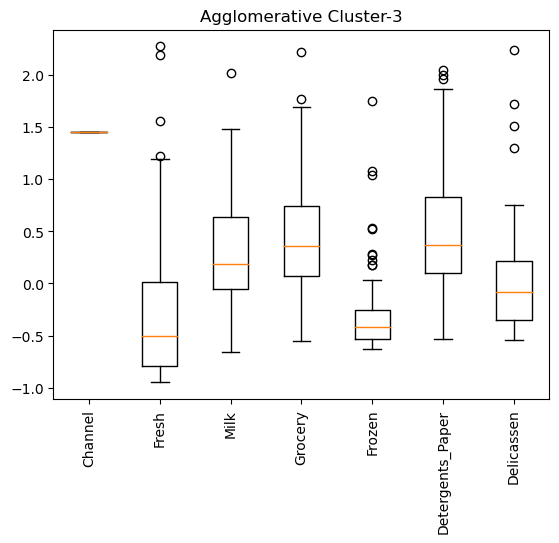

In [5]:
def plot_wholesale_boxplots(cluster_labels, data, cluster_name):
    unique_labels = np.unique(cluster_labels)
    num_clusters = len(unique_labels)

    for i in range(num_clusters):
        idx_cluster = np.where(cluster_labels == i)
        plt.figure()
        plt.title(f'{cluster_name} Cluster-{i+1}')
        plt.xticks(rotation=90)
        rows = idx_cluster[0].tolist()

        # Use all columns of the Wholesale customers data dataset
        cluster_data = data[rows, :]
        plt.boxplot(cluster_data,
                    labels=['Channel', 'Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen'])

# Convert data to numpy arrays
wholesale_X = np.array(scaled_data)

# K-means clustering
wholesale_kmeans = KMeans(n_clusters=3)
wholesale_kmeans.fit(scaled_data)
wholesale_kmeans_labels = wholesale_kmeans.predict(scaled_data)

# Hierarchical clustering
wholesale_agg_clustering = AgglomerativeClustering(n_clusters=3)
wholesale_agg_labels = wholesale_agg_clustering.fit_predict(scaled_data)

# Call the 'plot_wholesale_boxplots()' function for each clustering method
plot_wholesale_boxplots(wholesale_kmeans_labels, wholesale_X, 'K-means')
plot_wholesale_boxplots(wholesale_agg_labels, wholesale_X, 'Agglomerative')


In [6]:
#Create a second decision tree with name dt2 and max_depth=2

dt2 = DecisionTreeClassifier(max_depth=2, class_weight='balanced')
dt2.fit(X_train, y_train)
y_pred_dt2 = dt2.predict(X_test)

#Create a third decision tree with name dt3 and max_depth=3

dt3 = DecisionTreeClassifier(max_depth=3, class_weight='balanced')
dt3.fit(X_train, y_train)
y_pred_dt3 = dt3.predict(X_test)

#Create a fourth decision tree with name dt4 and max_depth=4

dt4 = DecisionTreeClassifier(max_depth=4, class_weight='balanced')
dt4.fit(X_train, y_train)
y_pred_dt4 = dt4.predict(X_test)


#Evaluate the performance of dt's

f1_dt2, precision_dt2, recall_dt2 = evaluate_classifier(y_test, y_pred_dt2)
print("Decision Tree 2 (max_depth=2):", f1_dt2, precision_dt2, recall_dt2)

f1_dt3, precision_dt3, recall_dt3 = evaluate_classifier(y_test, y_pred_dt3)
print("Decision Tree 3 (max_depth=3):", f1_dt3, precision_dt3, recall_dt3)

f1_dt4, precision_dt4, recall_dt4 = evaluate_classifier(y_test, y_pred_dt4)
print("Decision Tree 4 (max_depth=2):", f1_dt4, precision_dt4, recall_dt4)

f1_dt, precision_dt, recall_dt = evaluate_classifier(y_test, y_pred_dt)
print("Decision Tree 5 - Best from GRID (max_depth=5):", f1_dt, precision_dt, recall_dt)

Decision Tree 2 (max_depth=2): 0.4785208012326656 0.6370738636363636 0.38636363636363635
Decision Tree 3 (max_depth=3): 0.31084625977851305 0.6315769211026128 0.25
Decision Tree 4 (max_depth=2): 0.3967208315034403 0.6224729359593062 0.3181818181818182
Decision Tree 5 - Best from GRID (max_depth=5): 0.5973270644888397 0.7026346988194936 0.5340909090909091


In [10]:
# Visualize the decision tree
dot_data = export_graphviz(best_dt, out_file=None, filled=True, rounded=True, feature_names=selected_features, class_names=[f'Region {cls}' for cls in best_dt.classes_])
graph = graphviz.Source(dot_data)
graph.render("decision_tree", format="png")
graph.view()

'decision_tree.pdf'

In [11]:
# Visualize the decision tree of depth 2 
dot_data = export_graphviz(dt2, out_file=None, filled=True, rounded=True, feature_names=selected_features, class_names=[f'Region {cls}' for cls in best_dt.classes_])
graph = graphviz.Source(dot_data)
graph.render("decision_tree", format="png")
graph.view()


'decision_tree.pdf'

## One-vs-One approach (considering the weighted average for multi-class problems)

In [9]:
def calculate_roc_auc_score(y_test, y_pred):
    return roc_auc_score(y_test, y_pred, multi_class='ovo', average='weighted')

roc_auc_dt = calculate_roc_auc_score(y_test_binarized, y_pred_dt_binarized)
roc_auc_rf = calculate_roc_auc_score(y_test_binarized, y_pred_rf_binarized)
roc_auc_nn = calculate_roc_auc_score(y_test_binarized, y_pred_nn_binarized)

print("Decision Tree ROC AUC score:", roc_auc_dt)
print("Random Forest ROC AUC score:", roc_auc_rf)
print("Neural Network ROC AUC score:", roc_auc_nn)

Decision Tree ROC AUC score: 0.4515348918277086
Random Forest ROC AUC score: 0.4939759036144578
Neural Network ROC AUC score: 0.481622693304865
